# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [282]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [283]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [284]:
sinasc_raw.QTDGESTANT.head()


0    0.0
1    1.0
2    2.0
3    0.0
4    1.0
Name: QTDGESTANT, dtype: float64

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [285]:
sinasc_raw['Faixa_Latitude'] = np.where(sinasc_raw['munResLat'] > -10.5, 'Acima de -10.5', 'Abaixo de -10.5')

resultados = sinasc_raw.groupby('Faixa_Latitude').agg({
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

resultados.head()

PESO                                             \
                      sum         mean  min   max median         std   
Faixa_Latitude                                                         
Abaixo de -10.5  42101809  3240.096121  258  5985   3270  531.794694   
Acima de -10.5   45555148  3246.055864  295  5190   3275  556.487709   

                               IDADEMAE                                      \
                           var      sum       mean min max median       std   
Faixa_Latitude                                                                
Abaixo de -10.5  282805.596163   340167  26.178775  12  53     26  6.320171   
Acima de -10.5   309678.570242   365094  26.014964  11  52     25  6.447663   

                            
                       var  
Faixa_Latitude              
Abaixo de -10.5  39.944563  
Acima de -10.5   41.572355

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [286]:
sinasc_raw['faixa_area_municipio'] = np.where(sinasc_raw['munResArea'] > 3000, 'Acima de 3000', 'Abaixo de 3000')

resultados_2 = sinasc_raw.groupby('faixa_area_municipio').agg({
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

resultados_2.head()

QTDFILVIVO                                        \
                            sum      mean  min   max median       std   
faixa_area_municipio                                                    
Abaixo de 3000           4774.0  0.924298  0.0  30.0    1.0  1.075338   
Acima de 3000           22053.0  1.086890  0.0  14.0    1.0  1.191750   

                                IDADEPAI                                \
                           var       sum       mean   min   max median   
faixa_area_municipio                                                     
Abaixo de 3000        1.156352   78096.0  31.089172  16.0  69.0   30.0   
Acima de 3000         1.420268  158424.0  31.094014  15.0  86.0   30.0   

                                           
                           std        var  
faixa_area_municipio                       
Abaixo de 3000        7.676090  58.922352  
Acima de 3000         7.818364  61.126809

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [287]:
sinasc_raw['munResAlt'].mean()
"Resolvi escolher a média para determinar a faixa variavel no valor de 179"

sinasc_raw['faixa_munResAlt'] = np.where(sinasc_raw['munResAlt'] > 179, 'Acima de 179', 'Abaixo de 179')

resultados_3 = sinasc_raw.groupby('faixa_area_municipio').agg({
    'KOTELCHUCK': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDGESTANT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

resultados_3.head()

KOTELCHUCK                                               \
                            sum      mean min max median       std       var   
faixa_area_municipio                                                           
Abaixo de 3000            24495  4.692529   1   9      5  1.456892  2.122535   
Acima de 3000            109968  5.042553   1   9      5  2.182659  4.763998   

                     QTDGESTANT                                        \
                            sum      mean  min   max median       std   
faixa_area_municipio                                                    
Abaixo de 3000           5872.0  1.134467  0.0   9.0    1.0  1.208857   
Acima de 3000           27046.0  1.310368  0.0  52.0    1.0  1.447429   

                                
                           var  
faixa_area_municipio            
Abaixo de 3000        1.461335  
Acima de 3000         2.095052

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


<Figure size 1000x800 with 0 Axes>

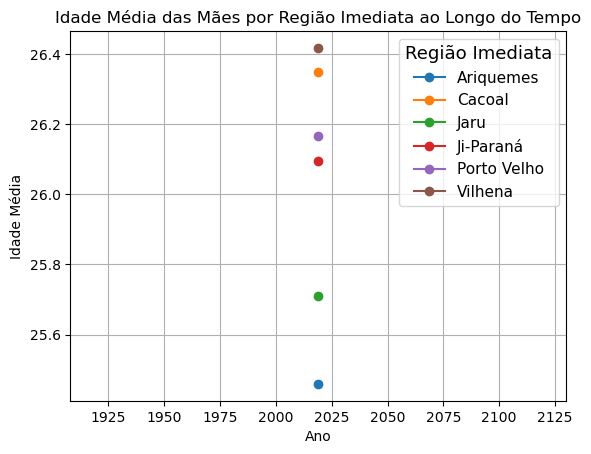

In [288]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

sinasc_raw['Regiao_Imediata'] = sinasc_raw['munResNome'].map(imediatas)


idade_media_por_regiao = sinasc_raw.groupby('Regiao_Imediata')['IDADEMAE'].mean()

plt.figure(figsize=(10, 8))
idade_media_por_ano_regiao.plot(kind='line', marker='o')
plt.title('Idade Média das Mães por Região Imediata ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Idade Média')
plt.grid(True)
plt.legend(title='Região Imediata', title_fontsize='13', fontsize='11')
plt.show()



### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [289]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M'
tabelas = pd.read_html(url, header=0)
df = tabelas[0]
tabela_59_linhas = df.iloc[:60]
indices_para_deletar = [0, 1, 2, 3, 11, 48, 58, 59]
tabela_59_linhas_linhas_deletadas = tabela_59_linhas.drop(indices_para_deletar)
tabela_59_linhas_linhas_deletadas.rename(columns={'Dados de 2010': 'IDH Municipal', 'Dados de 2010.1': 'IDH Renda', 'Dados de 2010.2': 'IDH Longevidade', 'Dados de 2010.3': 'IDH Educação'}, inplace=True)
tabela_59_linhas_linhas_deletadas.reset_index(drop=True, inplace=True)
tab_atualizada = pd.DataFrame(tabela_59_linhas_linhas_deletadas)
tab_atualizada[['IDH Municipal', 'IDH Renda', 'IDH Longevidade', 'IDH Educação']] = tab_atualizada[['IDH Municipal', 'IDH Renda', 'IDH Longevidade', 'IDH Educação']].astype(float)

bins = [0, 0.499, 0.599, 0.699, 0.799, 1.000]
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']

tab_atualizada['Faixa IDH'] = pd.cut(tab_atualizada['IDH Municipal'],
                                                        bins=bins, labels=labels, include_lowest=True)
resultado4 = tab_atualizada.groupby('Faixa IDH').agg({
    'IDH Municipal': ['mean', 'min', 'max'],  
    'IDH Renda': ['mean'],                   
    'IDH Educação': ['median']                
})
tab1 = tab_atualizada
tab1

,Posição,Município,IDH Municipal,IDH Renda,IDH Longevidade,IDH Educação,Faixa IDH
0,1,Porto Velho,0.736,0.764,0.819,0.638,Alto
1,2,Vilhena,0.731,0.734,0.808,0.659,Alto
2,3,Cacoal,0.718,0.727,0.821,0.620,Alto
3,4,Ji-Paraná,0.714,0.728,0.810,0.617,Alto
4,5,Pimenta Bueno,0.710,0.726,0.803,0.613,Alto
5,6,Ariquemes,0.702,0.716,0.806,0.600,Alto
6,7,Rolim de Moura,0.700,0.709,0.808,0.598,Alto
7,8,Cerejeiras,0.692,0.688,0.799,0.602,Médio
8,9,Jaru,0.689,0.687,0.825,0.577,Médio
9,10,Colorado do Oeste,0.685,0.676,0.814,0.584,Médio


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [290]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM'
tabelas = pd.read_html(url, header=0)
df = tabelas[0]
df_para_deletar = [0, 1, 2, 29, 56, 57]
df_linhas_deletadas = df.drop(df_para_deletar)
df_linhas_deletadas.reset_index(drop=True, inplace=True)
print('O Índice FIRJAN de Desenvolvimento Municipal (IFDM) é um estudo anual criado para acompanhar o desenvolvimento humano, econômico e social dos municípios do Estado do Rio de Janeiro, mas passou a acompanhar todos os municípios do Brasil (5.565 no total),[2] com base exclusivamente em estatísticas oficiais.')
df_linhas_deletadas['IFDM Consolidado (2013)'] = df_linhas_deletadas['IFDM Consolidado (2013)'].astype(float)
tabela_ifdm = df_linhas_deletadas

bins = [0, 0.450, 0.599, 0.699, 0.799, 1.000]
labels = ['Desenvolvimento Muito Baixo', 'Desenvolvimento Baixo', 'Desenvolvimento Médio', 'Desenvolvimento Alto', 'Desenvolvimento Muito Alto']

tabela_ifdm['Tabela IDH'] = pd.cut(tabela_ifdm['IFDM Consolidado (2013)'],
                                                        bins=bins, labels=labels, include_lowest=True)
resultado5 = tabela_ifdm.groupby('Tabela IDH').agg({
    'IFDM Consolidado (2013)': ['mean', 'min', 'max']
})

resultado5
tab2 = tabela_ifdm
tab2

O Índice FIRJAN de Desenvolvimento Municipal (IFDM) é um estudo anual criado para acompanhar o desenvolvimento humano, econômico e social dos municípios do Estado do Rio de Janeiro, mas passou a acompanhar todos os municípios do Brasil (5.565 no total),[2] com base exclusivamente em estatísticas oficiais.


,Posição,Município,IFDM Consolidado (2013),Tabela IDH
0,1º,Ariquemes,0.7746,Desenvolvimento Alto
1,2º,Vilhena,0.7465,Desenvolvimento Alto
2,3º,Pimenta Bueno,0.7383,Desenvolvimento Alto
3,4º,Porto Velho,0.7257,Desenvolvimento Alto
4,5º,Ji-Paraná,0.7117,Desenvolvimento Alto
5,6º,Cacoal,0.7111,Desenvolvimento Alto
6,7º,Santa Luzia d'Oeste,0.6850,Desenvolvimento Médio
7,8º,Rolim de Moura,0.6785,Desenvolvimento Médio
8,9º,Chupinguaia,0.6766,Desenvolvimento Médio
9,10º,São Miguel do Guaporé,0.6699,Desenvolvimento Médio


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [291]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB'
tabelas = pd.read_html(url, header=0)
df1 = tabelas[0]
df2 = tabelas[1]
df3 = tabelas[2]
df4 = tabelas[3]
df5 = tabelas[4]
df6 = tabelas[5]
df_concatenado = pd.concat([df1, df2, df3, df4, df5, df6], axis=0, ignore_index=True)
df_para_deletar_c = [0, 9, 19, 27, 32, 49]
df_linhas_deletadas_c = df_concatenado.drop(df_para_deletar_c)
juncao_tabelas = df_linhas_deletadas_c
tab3 = juncao_tabelas
tab3

,Posição,Posição.1,Município,PIB,Alteração
1,1,(0),Porto Velho,17 912 070,NaN
2,2,(0),Ji-Paraná,3 783 972,NaN
3,3,(0),Vilhena,2 831 175,NaN
4,4,(0),Ariquemes,2 579 830,NaN
5,5,(0),Cacoal,2 261 644,NaN
6,6,(0),Jaru,1 500 890,NaN
7,7,(0),Rolim de Moura,1 283 434,NaN
8,8,(0),Pimenta Bueno,1 164 877,NaN
10,9,(0),Guajará-Mirim,893 000,NaN
11,10,(0),Ouro Preto do Oeste,834 000,NaN


In [293]:
print('Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave')

merged_1 = pd.merge(tab1, tab2, on='Município', how='outer')
merged_final = pd.merge(merged_1, tab3, on='Município', how='outer')
data = merged_final.drop(columns=['Posição_y', 'Posição', 'Posição', 'Posição_x', 'Alteração', 'Posição.1'])
data

Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


Index(['Município', 'IDH Municipal', 'IDH Renda', 'IDH Longevidade',
       'IDH Educação', 'Faixa IDH', 'IFDM Consolidado (2013)', 'Tabela IDH',
       'PIB'],
      dtype='object')